<a href="https://colab.research.google.com/github/zaellis/270Computer/blob/master/openram_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenRAM SKY130 playground

Generate OpenRAM macros with `open_pdks.sky130a`.

In [ ]:
#@title Install dependencies {display-mode: "form"}
#@markdown - Click the ▷ button to setup the digital design environment based on [conda-eda](https://github.com/hdl/conda-eda).

openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.sky130a={open_pdks_version}
!python -m pip install --no-binary gdstk gdstk cairosvg
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))


                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/


Pinned packages:
  - python 3.7*


Transaction

  Prefix: /content/conda-env

  Updating specs:

   - openlane=*
   - open_pdks.sky130a=*


  Package                             Version  Build                 Channel                 Size
───────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────

## Get OpenRAM

Get latest release and install requirements from PyPI.

In [8]:
%env PDK_ROOT=/content/conda-env/share/pdk
!git clone --depth=1 -b stable https://github.com/VLSIDA/OpenRAM.git
!python -m pip install -r OpenRAM/requirements.txt
!git clone --depth=1 https://github.com/vlsida/sky130_fd_bd_sram $PDK_ROOT/sky130_fd_bd_sram
!git clone --depth=1 https://github.com/google/skywater-pdk-libs-sky130_fd_sc_hd $PDK_ROOT/skywater-pdk/libraries/sky130_fd_sc_hd/latest
%env OPENRAM_HOME=/content/OpenRAM/compiler
%env OPENRAM_TECH=/content/OpenRAM/technology
%env PYTHONPATH=/content/OpenRAM/compiler:/content/OpenRAM/technology:/content/OpenRAM/technology/sky130/custom
!make -C OpenRAM $OPENRAM_HOME/../technology/sky130/gds_lib \
                 $OPENRAM_HOME/../technology/sky130/mag_lib \
                 $OPENRAM_HOME/../technology/sky130/sp_lib \
                 $OPENRAM_HOME/../technology/sky130/lvs_lib \
                 $OPENRAM_HOME/../technology/sky130/calibre_lvs_lib \
                 $OPENRAM_HOME/../technology/sky130/klayout_lvs_lib \
                 $OPENRAM_HOME/../technology/sky130/maglef_lib

env: PDK_ROOT=/content/conda-env/share/pdk
/bin/bash: /content/conda-env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into 'OpenRAM'...
/usr/lib/git-core/git-remote-https: symbol lookup error: /lib/x86_64-linux-gnu/libp11-kit.so.0: undefined symbol: ffi_type_pointer, version LIBFFI_BASE_7.0
/bin/bash: /content/conda-env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'OpenRAM/requirements.txt'
/bin/bash: /content/conda-env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into '/content/conda-env/share/pdk/sky130_fd_bd_sram'...
/usr/lib/git-core/git-remote-https: symbol lookup error: /lib/x86_64-linux-gnu/libp11-kit.so.0: undefined symbol: ffi_type_pointer, version LIBFFI_BASE_7.0
/bin/bash: /content/conda-env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into '/content/co

In [ ]:
%%writefile config.py
word_size = 8 # Bits
num_words = 32

# Allow byte writes
write_size = 8 # Bits

# Dual port
num_rw_ports = 0
num_r_ports = 1
num_w_ports = 1
ports = '1r1w'

tech_name = 'sky130'
nominal_corner_only = True

# Local wordlines have issues with met3 power routing for now
#local_array_size = 16

route_supplies = 'ring'
check_lvsdrc = True
uniquify = True

output_name = f'{tech_name}_sram_{ports}_{word_size}x{num_words}_{write_size}'
output_path = '.'

Writing config.py


In [ ]:
!python $OPENRAM_HOME/openram.py -v config.py

[globals/init_openram]: Initializing OpenRAM...
[globals/setup_paths]: Temporary files saved in /tmp/openram_root_2748_temp/
[globals/read_config]: Configuration file is /content/config.py
[globals/read_config]: Output saved in /content/./
[globals/import_tech]: Adding technology path: /content/OpenRAM/technology
[globals/init_paths]: Creating temp directory: /tmp/openram_root_2748_temp/
[characterizer/<module>]: Initializing characterizer...
[characterizer/<module>]: Analytical model enabled.
[globals/setup_bitcell]: Using bitcell: bitcell_2port
[verify/<module>]: Initializing verify...
[verify/<module>]: Finding DRC/LVS/PEX tools.
[globals/get_tool]: Using DRC: /content/conda-env/bin/magic
[globals/get_tool]: Using LVS: /content/conda-env/bin/netgen
[globals/get_tool]: Using PEX: /content/conda-env/bin/magic
[globals/setup_bitcell]: Using bitcell: bitcell_2port
|==============================================================================|
|=========                       OpenRAM v1

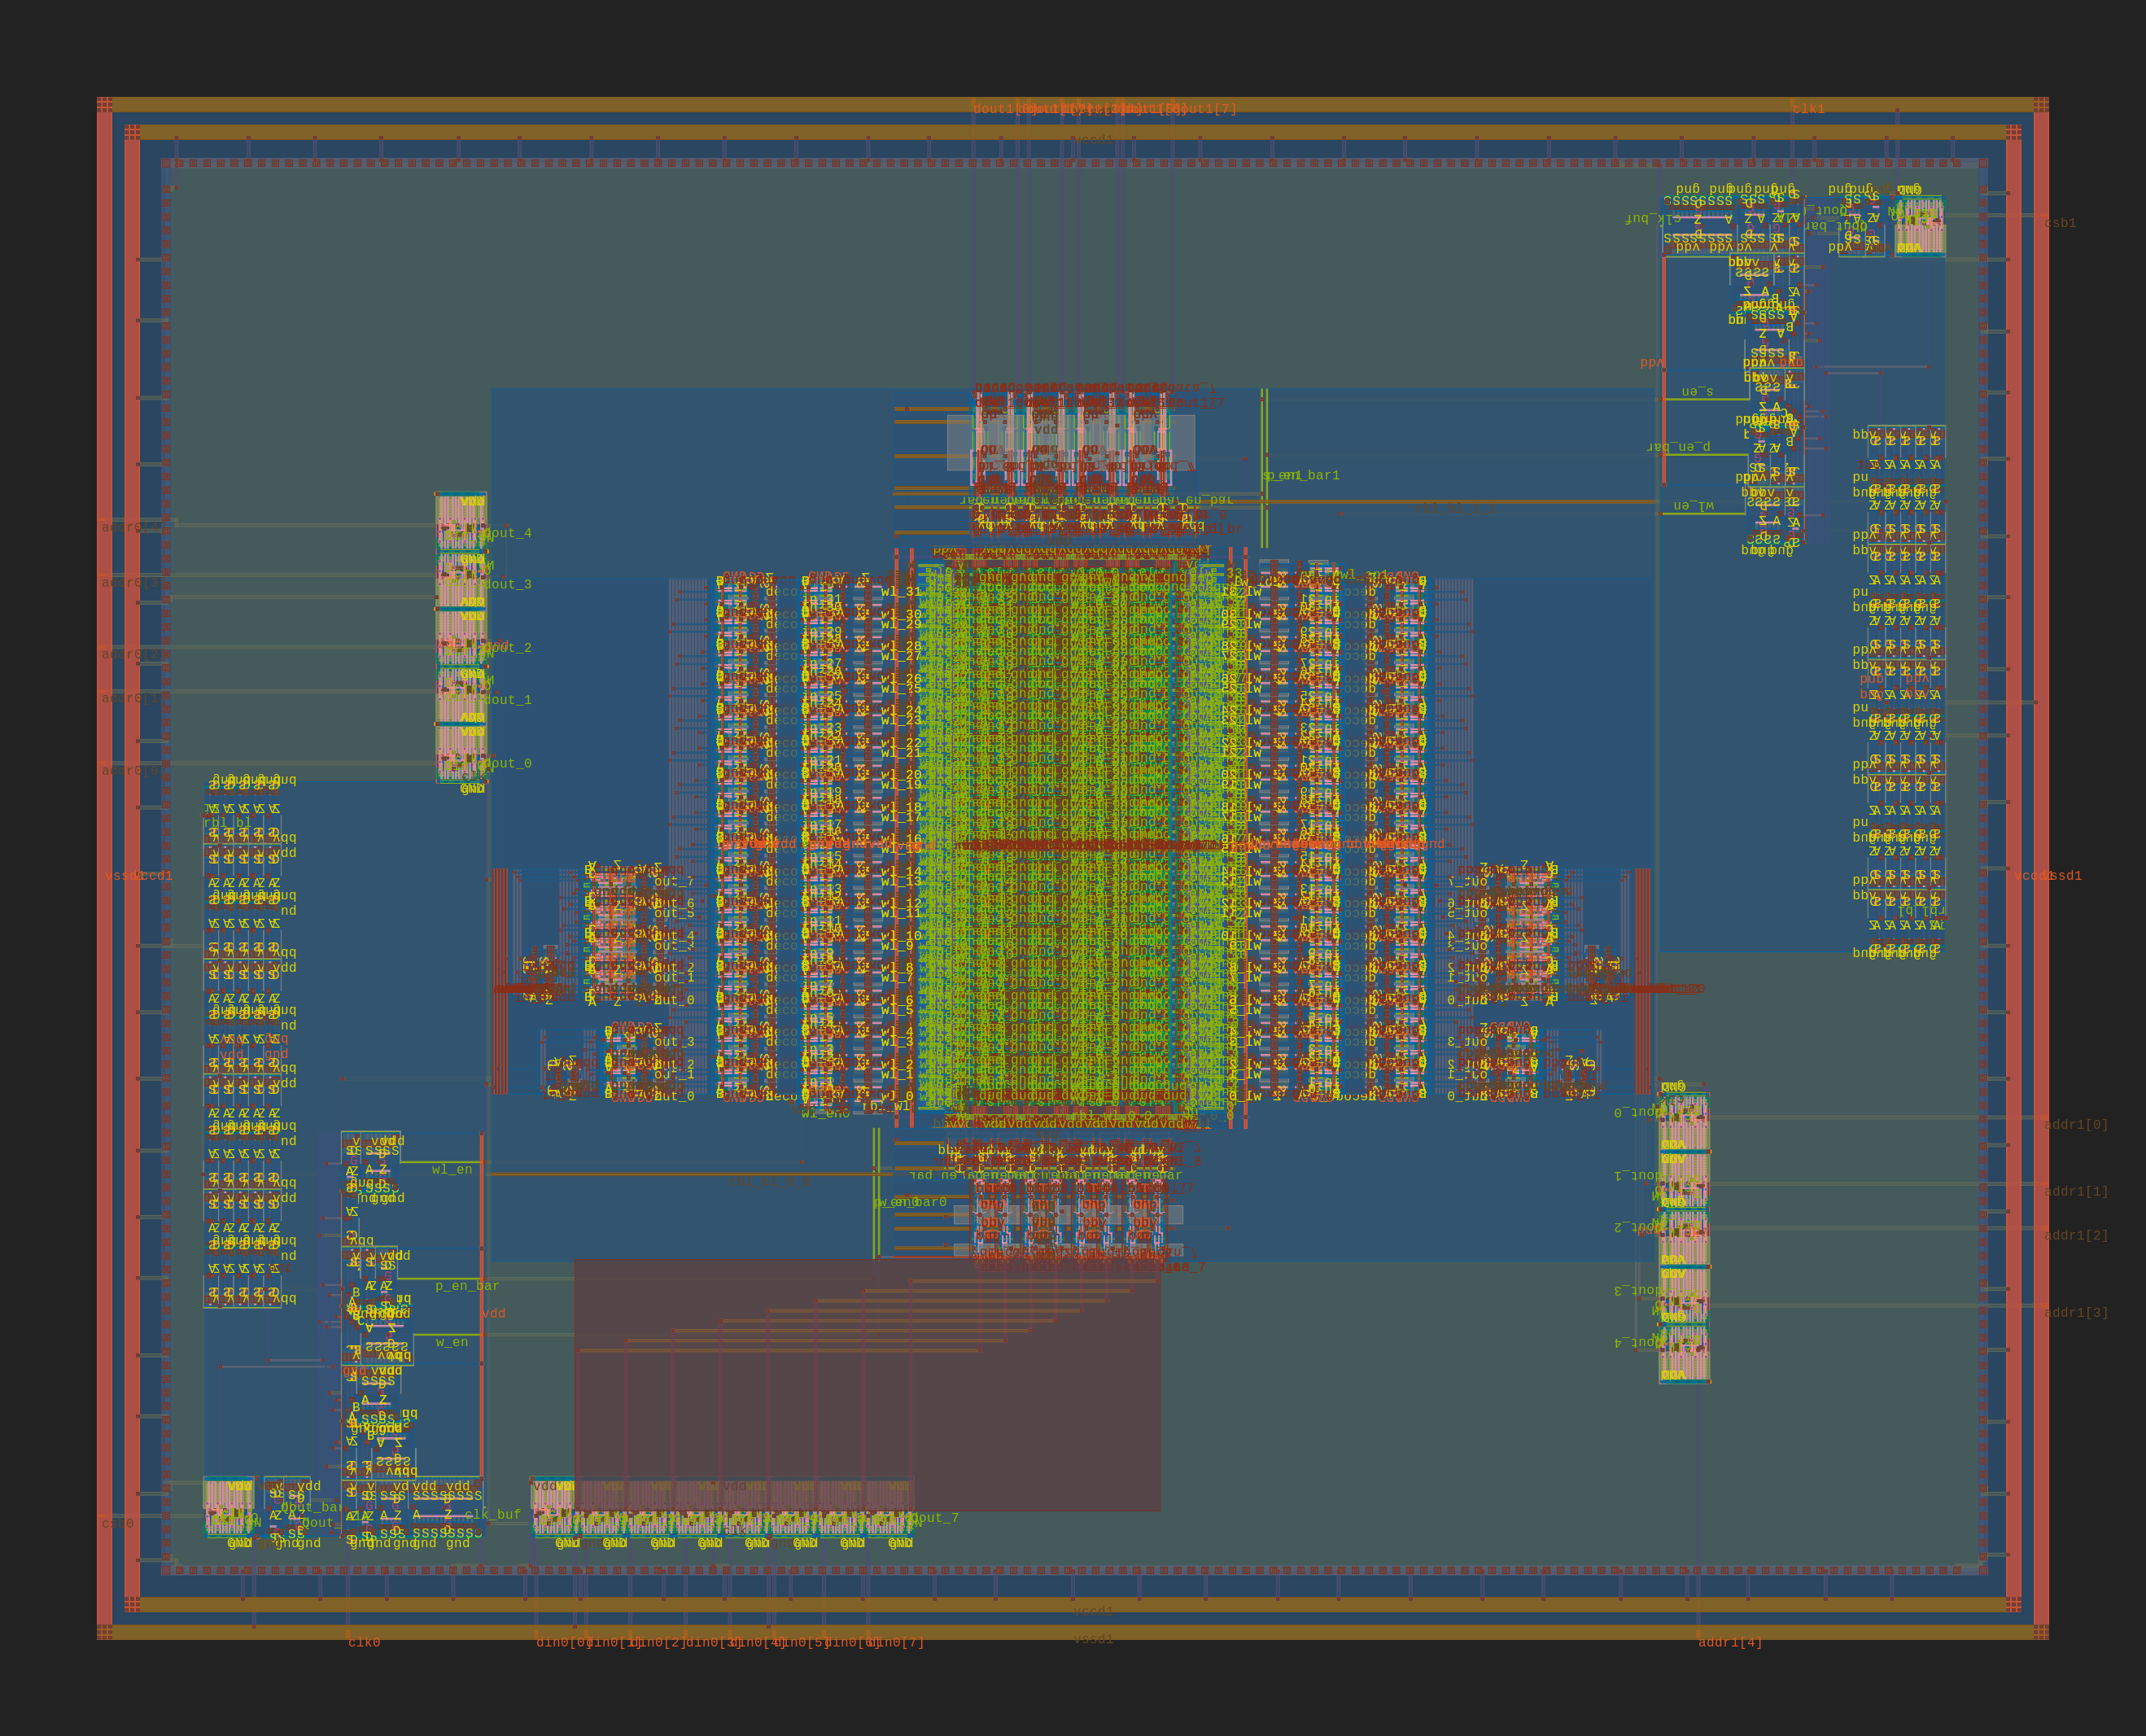

In [ ]:
import gdstk
library = gdstk.read_gds('sky130_sram_1r1w_8x32_8.gds')
top_cells = library.top_level()
top_cells[0].write_svg('sky130_sram_1r1w_8x32_8.svg')
import cairosvg
cairosvg.svg2png(url='sky130_sram_1r1w_8x32_8.svg', write_to='sky130_sram_1r1w_8x32_8.png')
from IPython.display import Image
Image('sky130_sram_1r1w_8x32_8.png')